In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Telescope_Data.csv")
df.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


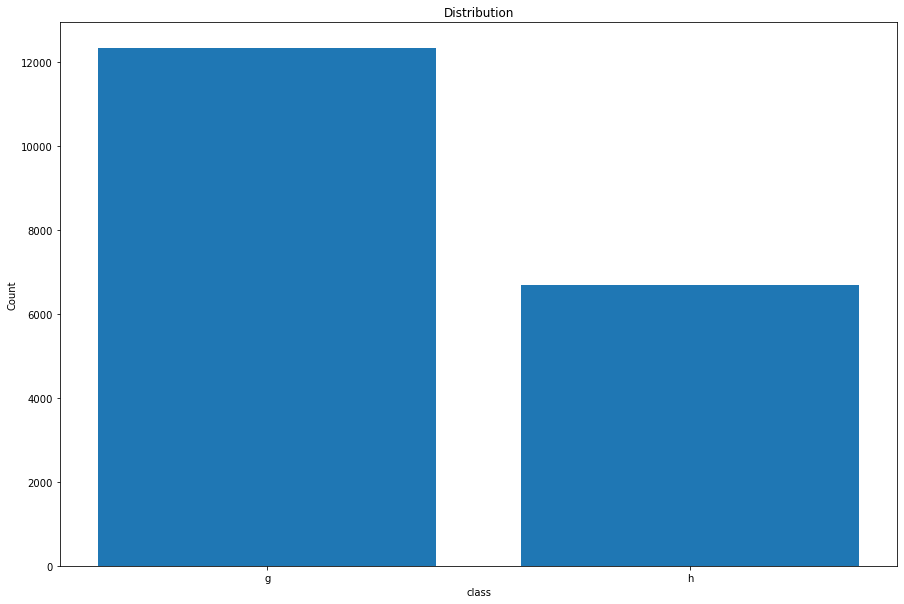

g = Gamma and h = Hadron
  class  Count
0     g  12332
1     h   6688


In [3]:
class_dist = pd.DataFrame(df['class'].value_counts()).reset_index()
class_dist = class_dist.rename(columns = {"index":"class", "class":"Count"})

plt.figure(figsize=(15,10))
plt.bar(class_dist['class'], class_dist['Count'])
plt.xlabel("class")
plt.ylabel("Count")
plt.title("Distribution")
plt.show()
print('g = Gamma and h = Hadron')
print(class_dist)

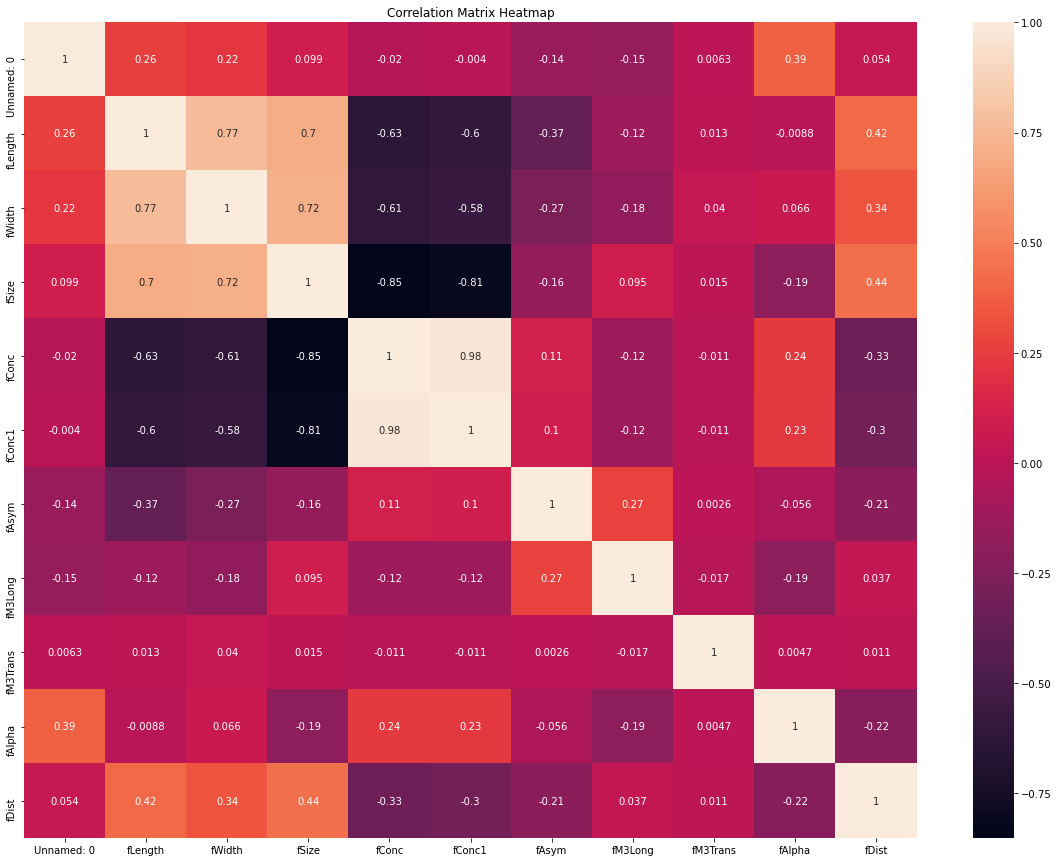

In [4]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [5]:
y = df['class'].values
X = df.iloc[:, :-1].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pd.DataFrame(y_test)[0].value_counts()

0    2466
1    1338
Name: 0, dtype: int64

In [6]:
kalgparameterlist = [ "auto", "full", "elkan"]

for i in kalgparameterlist:
    model_km = KMeans(n_clusters = 2, algorithm = i)
    model_km.fit(X_train, y_train)
    y_pred_km = model_km.predict(X_test)
    print(f'Accuracy of KMeans Clustering Model {accuracy_score(y_test, y_pred_km) * 100}%')

    cm_km = confusion_matrix(y_test, y_pred_km)
    print(['g', 'h'])
    print(cm_km)
    print("\n")

Accuracy of KMeans Clustering Model 54.75814931650894%
['g', 'h']
[[1476  990]
 [ 731  607]]


Accuracy of KMeans Clustering Model 55.33648790746582%
['g', 'h']
[[1504  962]
 [ 737  601]]


Accuracy of KMeans Clustering Model 44.66351209253418%
['g', 'h']
[[ 962 1504]
 [ 601  737]]




In [8]:
svmalgparameterlist = [ "sigmoid", "rbf", "poly"]

for i in svmalgparameterlist:
    model_svm = SVC(kernel = i)
    model_svm.fit(X_train, y_train)
    y_pred_svm = model_svm.predict(X_test)
    print(f'Accuracy of SVM Model {accuracy_score(y_test, y_pred_svm) * 100}%')

    cm_svm = confusion_matrix(y_test, y_pred_svm)
    print(['g', 'h'])
    print(cm_svm)
    print("\n")

Accuracy of SVM Model 85.67297581493165%
['g', 'h']
[[2203  263]
 [ 282 1056]]


Accuracy of SVM Model 99.29022082018928%
['g', 'h']
[[2451   15]
 [  12 1326]]


Accuracy of SVM Model 98.08096740273396%
['g', 'h']
[[2454   12]
 [  61 1277]]




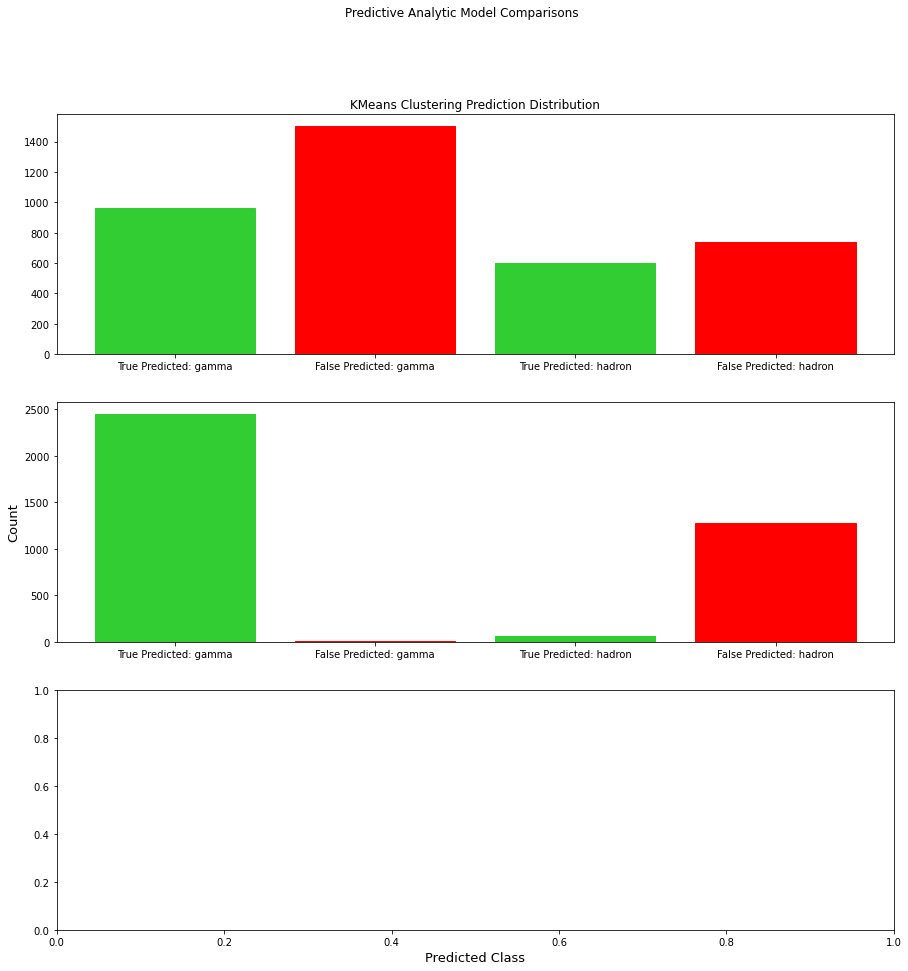

In [9]:
cm_km[1] = np.flip(cm_km[1])
cm_names = ['True Predicted: gamma', 'False Predicted: gamma', 'True Predicted: hadron', 'False Predicted: hadron']

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,15))
fig.suptitle('Predictive Analytic Model Comparisons')
ax2.set_ylabel('Count', fontsize=13)


barlist_km = ax1.bar(cm_names, cm_km.flatten())
barlist_km[0].set_color('limegreen')
barlist_km[1].set_color('r')
barlist_km[2].set_color('limegreen')
barlist_km[3].set_color('r')

barlist_km = ax2.bar(cm_names, cm_svm.flatten())
barlist_km[0].set_color('limegreen')
barlist_km[1].set_color('r')
barlist_km[2].set_color('limegreen')
barlist_km[3].set_color('r')

ax1.title.set_text('KMeans Clustering Prediction Distribution')

plt.xlabel('Predicted Class', fontsize=13)
plt.show()